**문제정의 (Problem Define)**
오렌지 품질을 결정하는 다양한 요소를 살펴보고 품질을 결정하고, 예측할 수 있는 다양한 머신러닝 알고리즘을 사용하여 분류 및 예측을 수행하여 본다.

**1. 라이브러리 불러오기**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# 추가로 머신러닝 모델을 돌리기 위한 문장을 import합니다.
# Decision Tree RotationForest RandomForest 등

**2. 데이터 수집하기**

In [ ]:
df = pd.read_csv('/content/Orange Quality Data.csv')

In [ ]:
#데이터셋을 불러와서 첫 세 줄을 출력하여 데이터의 구성을 살펴봅니다.
df.head(3)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0


변수 의미
- Size (cm): 과일의 크기
- Weight (g): 과일의 무게
- Brix (Sweetness): 과일의 단맛
- pH (Acidity): 과일의 산도
- Softness (1-5): 과일의 부드러운 정도
- HarvestTime (days): 과일 수확 시기
- Ripeness (1-5): 과일의 숙성 정도
- Color: 과일의 색상
- Variety: 과일의 다양성 (품종)
- Blemishes (Y/N): 과일의 흠집
- Quality (1-5): 최종 과일의 품질


**3. 탐색적 분석(EDA)**



In [ ]:
### 데이터 셋 구조 보기
df.shape

(241, 11)

In [ ]:
### 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [ ]:
### 결측치 확인
df.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [ ]:
### 통계치 확인
### 숫자형 변수만 뽑아서 기본 통계를 해본다.
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [ ]:
### 범주형 변수 확인(색상)
num_color=df['Color'].unique()
print(len(num_color))
num_color

5


array(['Orange', 'Deep Orange', 'Light Orange', 'Orange-Red',
       'Yellow-Orange'], dtype=object)

오렌지의 색상은 Orange, Deep Orange, Light Orange, Orange-Red, Yellow-Orange 총 5가지 종류가 있음을 확인

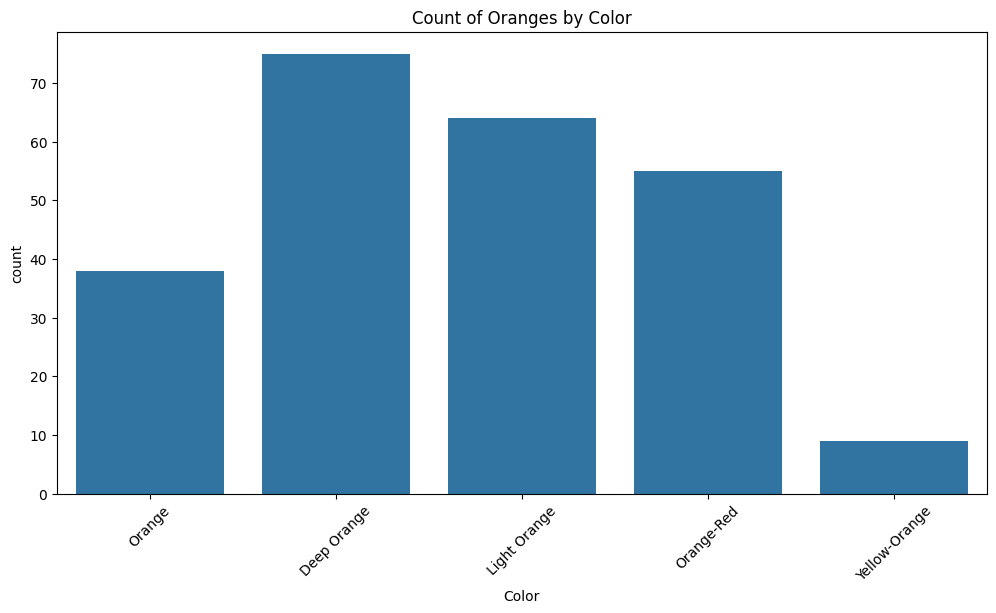

In [ ]:
### 오렌지 색상 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x="Color", data=df)
plt.title("Count of Oranges by Color")
plt.xticks(rotation=45)
plt.show()

In [ ]:
### 범주형 변수 확인(품종)
num_variety=df['Variety'].unique()
print(len(num_variety))
num_variety

24


array(['Valencia', 'Navel', 'Cara Cara', 'Blood Orange', 'Hamlin',
       'Tangelo (Hybrid)', 'Murcott (Hybrid)', 'Moro (Blood)', 'Jaffa',
       'Clementine', 'Washington Navel', 'Star Ruby', 'Tangerine',
       'Ambiance', 'California Valencia', 'Honey Tangerine',
       'Navel (Late Season)', 'Clementine (Seedless)', 'Temple',
       'Minneola (Hybrid)', 'Satsuma Mandarin', 'Midsweet (Hybrid)',
       'Navel (Early Season)', 'Ortanique (Hybrid)'], dtype=object)

오렌지 품종은 약 24가지로 나눌 수 있음을 확인

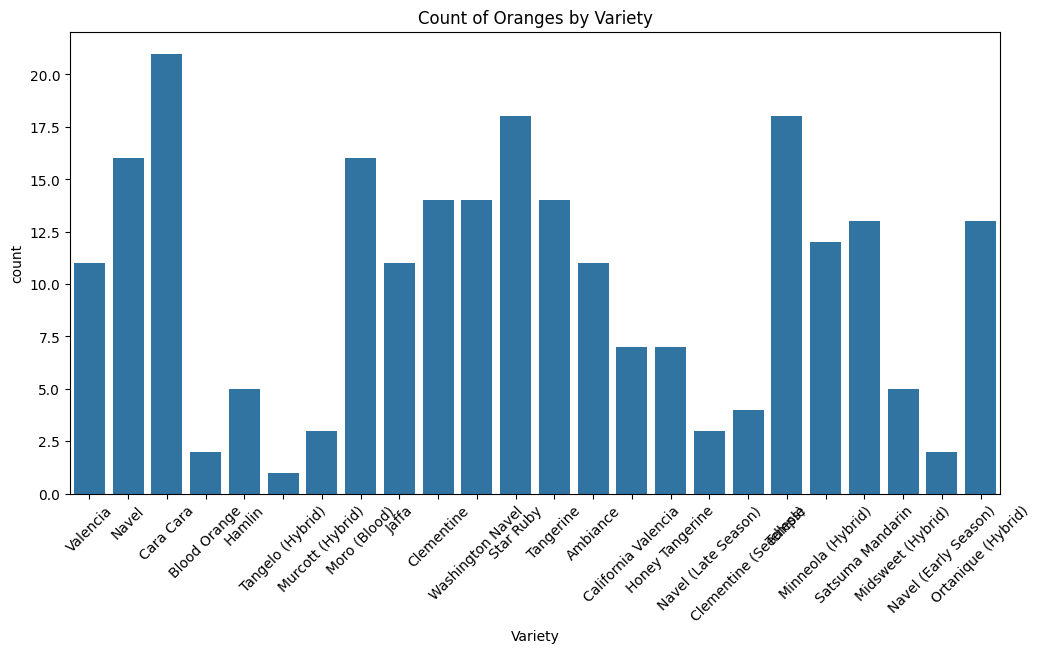

In [ ]:
### 오렌지 품종 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x="Variety", data=df)
plt.title("Count of Oranges by Variety")
plt.xticks(rotation=45)
plt.show()

컬럼 특성 확인

<ipython-input-16-2be993e7f352>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


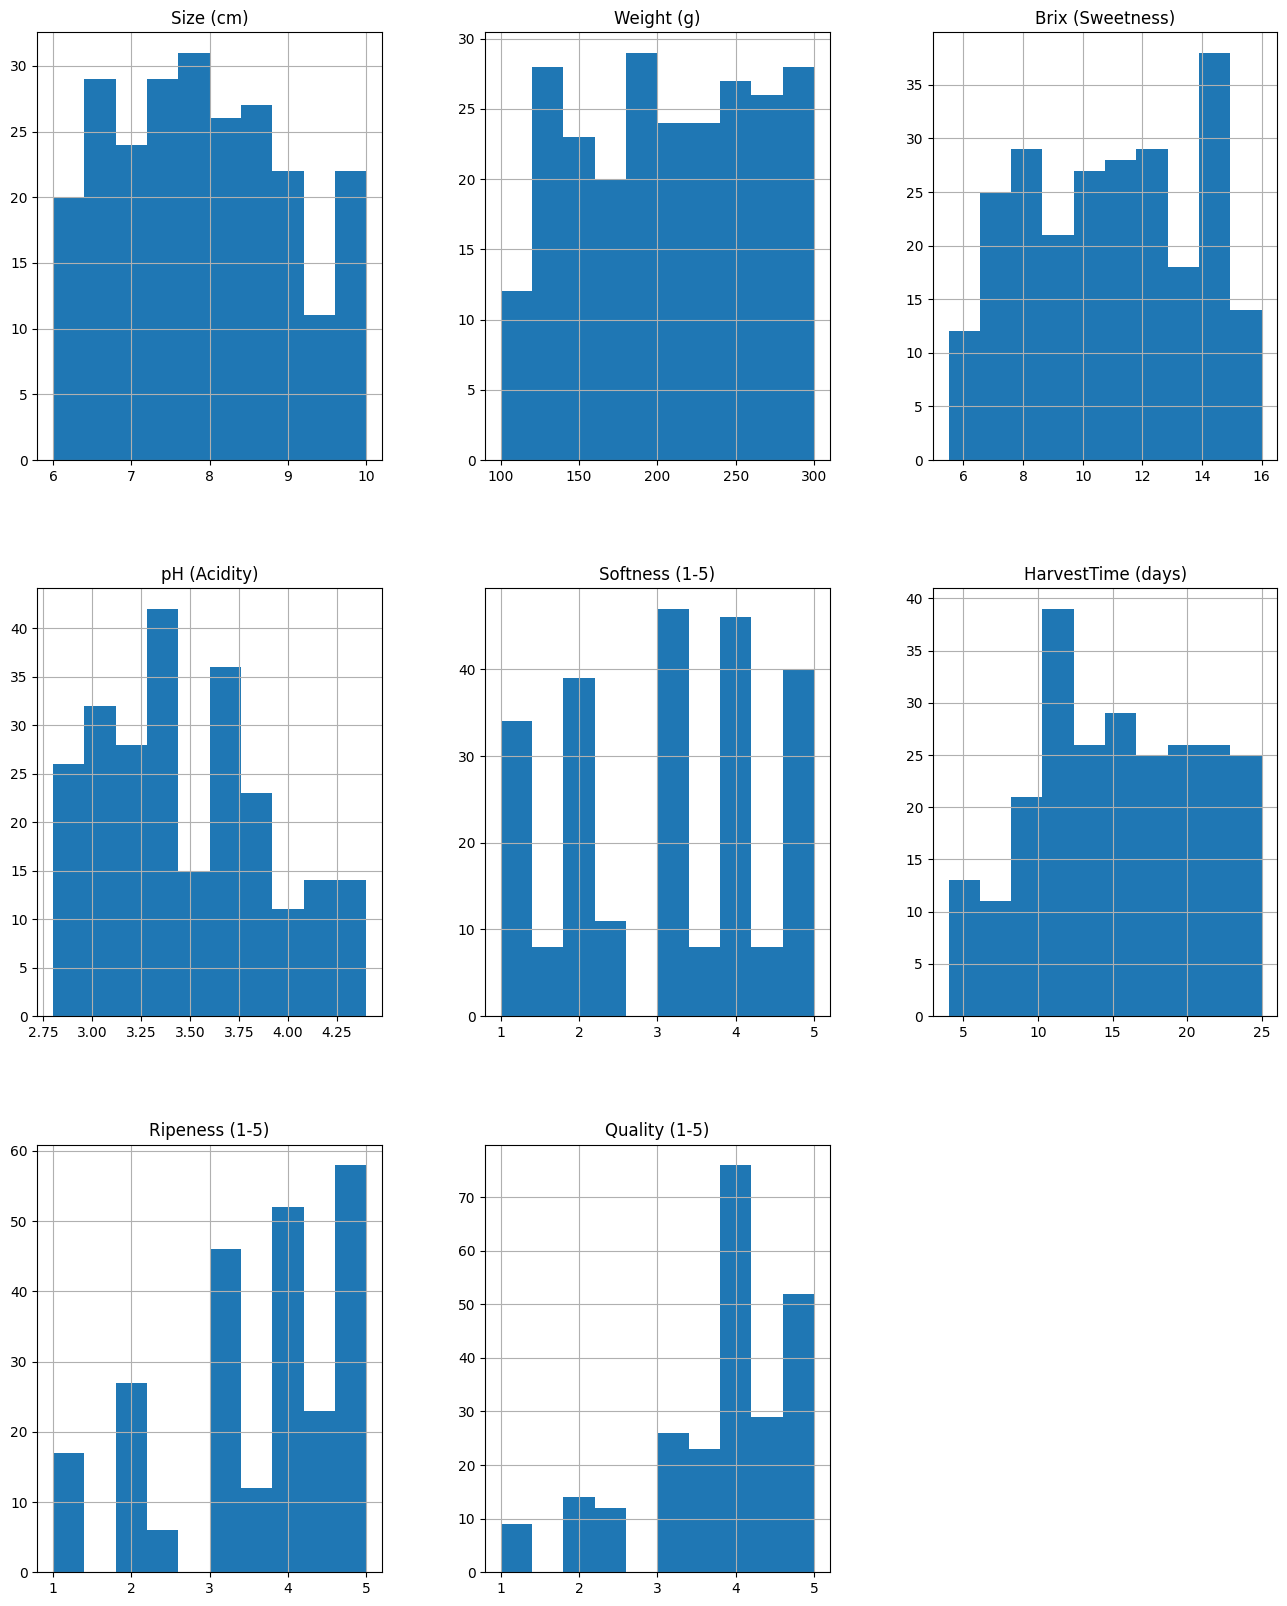

In [ ]:
### 숫자형 변수들만 먼저 살펴봅니다.
### numerical features
numerical_columns=['Size (cm)',	'Weight (g)',	'Brix (Sweetness)',	'pH (Acidity)',	'Softness (1-5)',	'HarvestTime (days)',	'Ripeness (1-5)',	'Quality (1-5)']

### figsize()는 plot()의 기본 크기를 지정합니다.
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

### gca()
### gca()로 현재의 Axes로 현재의 Figure 객체를 구할 수 있다.

df[numerical_columns].hist(ax=ax)
plt.show()

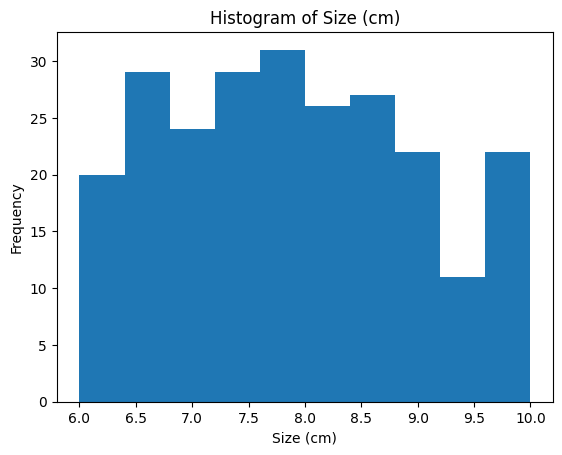

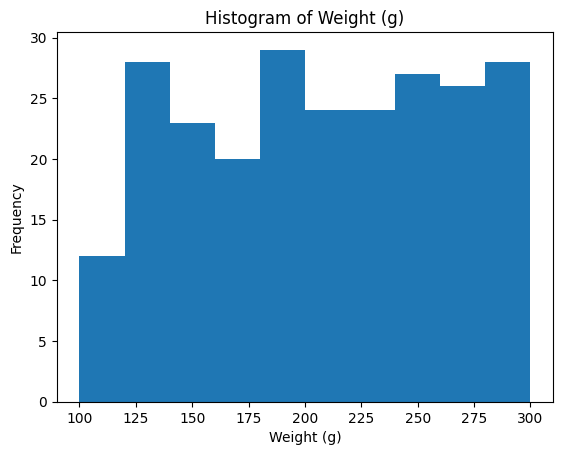

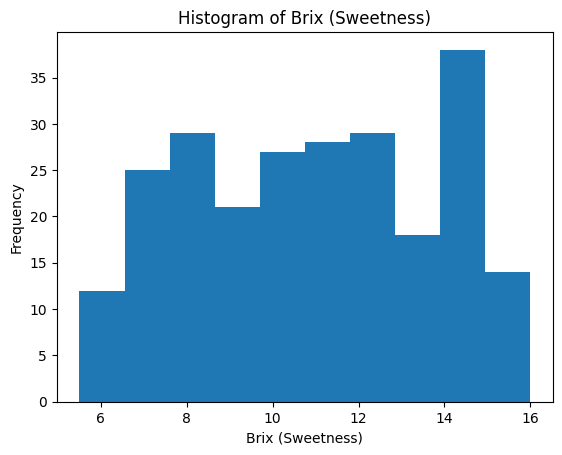

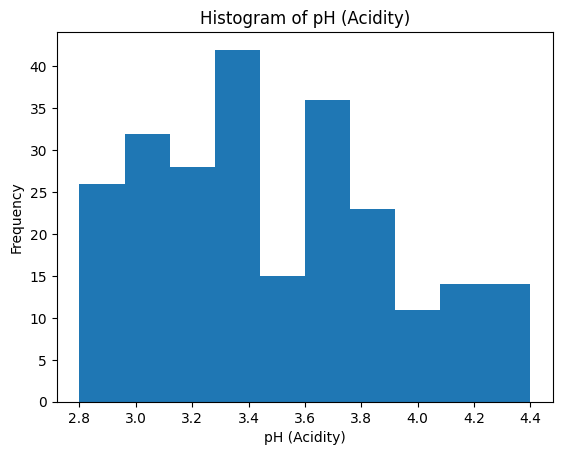

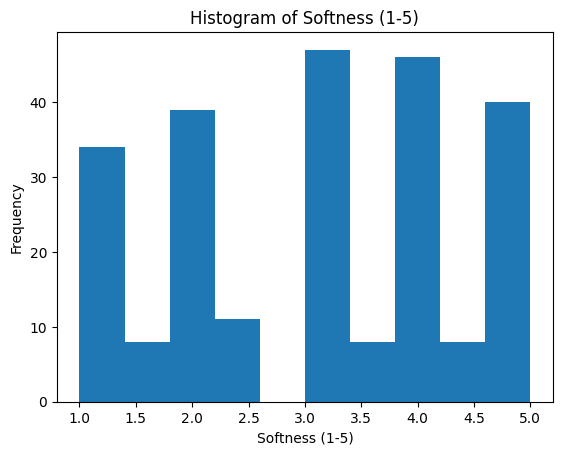

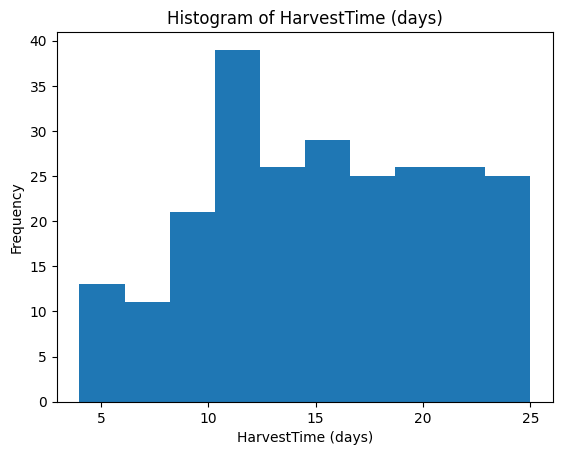

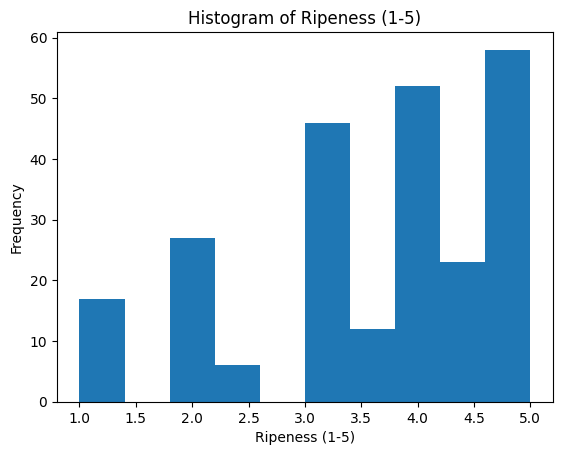

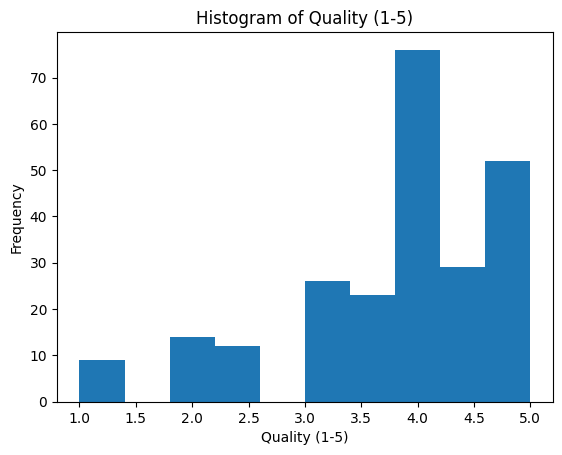

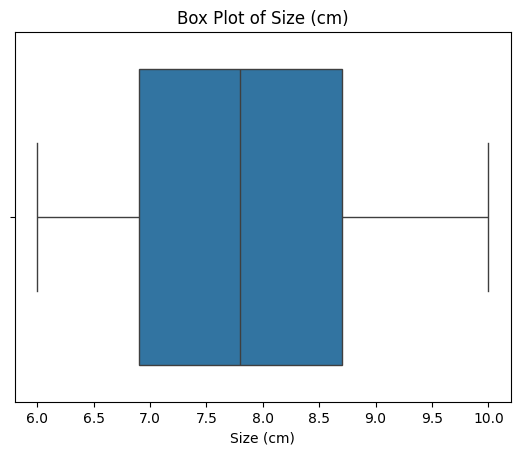

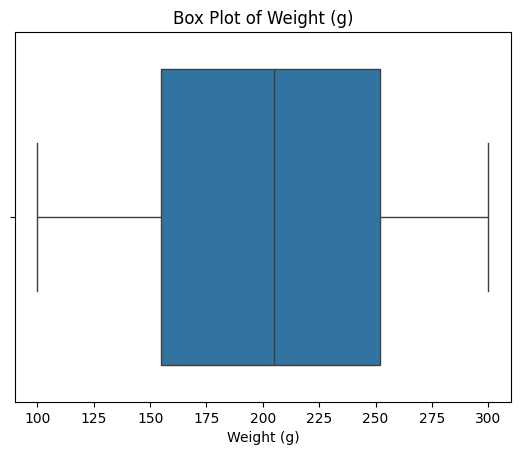

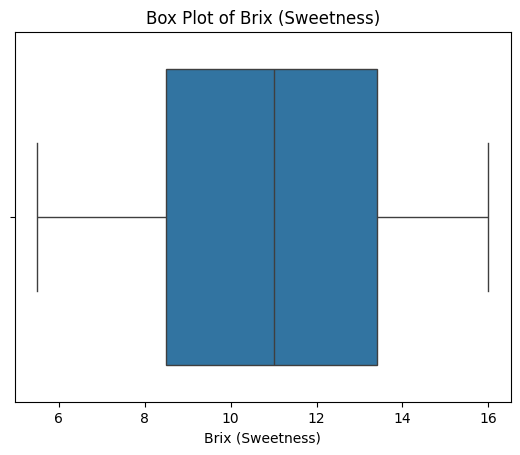

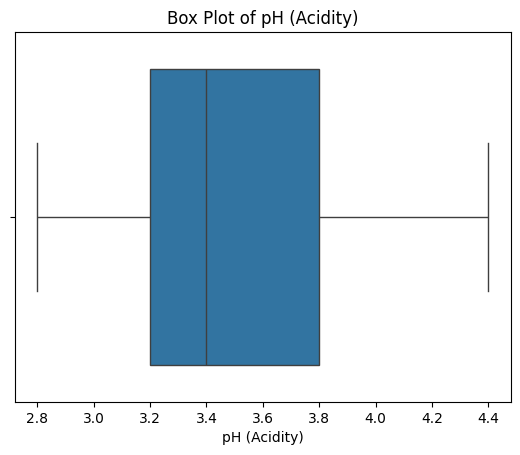

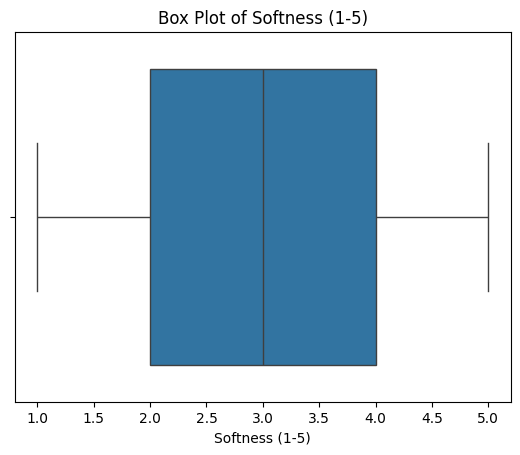

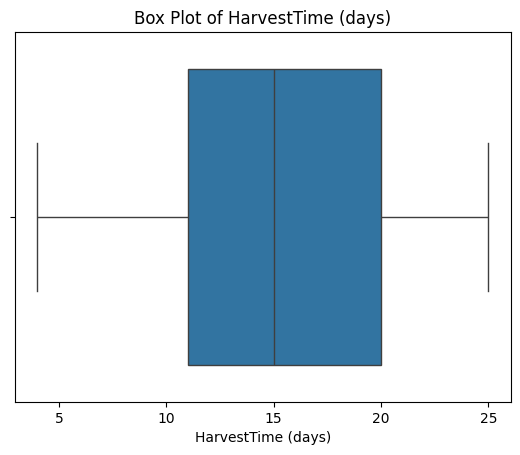

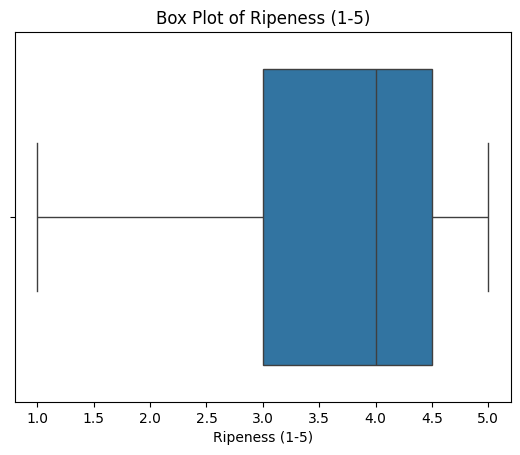

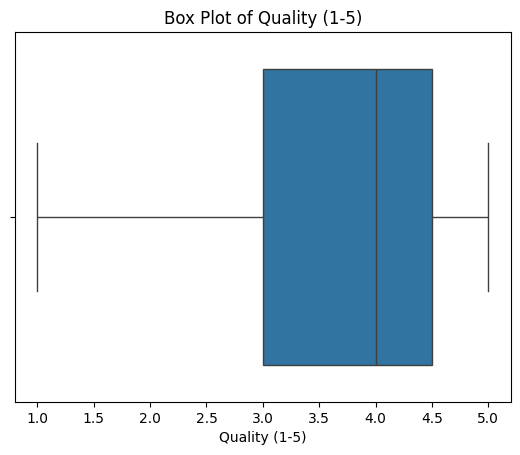

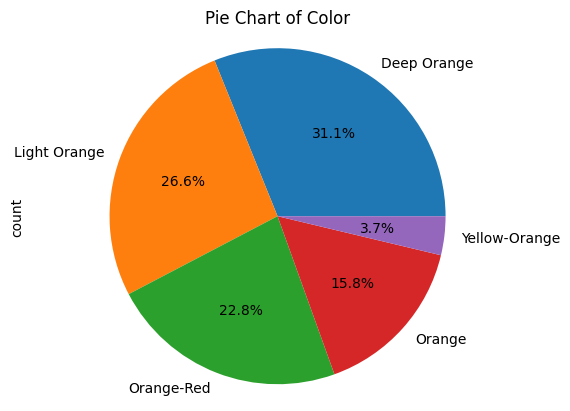

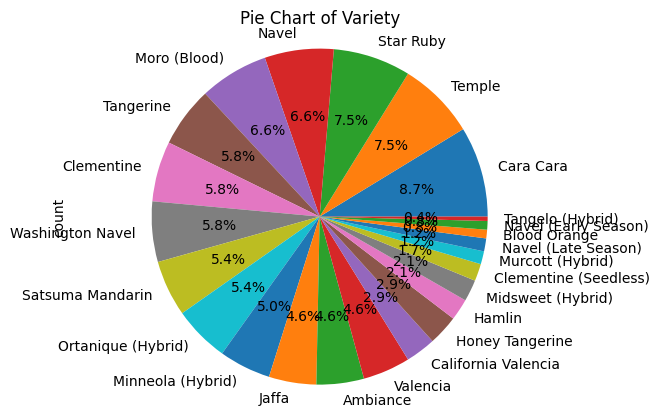

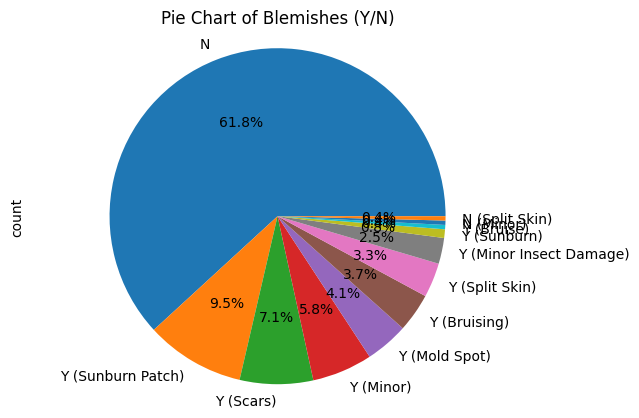

In [ ]:
### 히스토그램
numeric_columns = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)']
for column in numeric_columns:
    plt.hist(df[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column)
    plt.show()

### 박스플랏
for column in numeric_columns:
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.title('Box Plot of ' + column)
    plt.show()

### 등등 기본적인 데이터 시각화 진행
### 원 그래프
categorical_columns = ['Color', 'Variety', 'Blemishes (Y/N)']
for column in categorical_columns:
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Pie Chart of ' + column)
    plt.show()

종속변수(목표변수) 탐색

<Axes: >

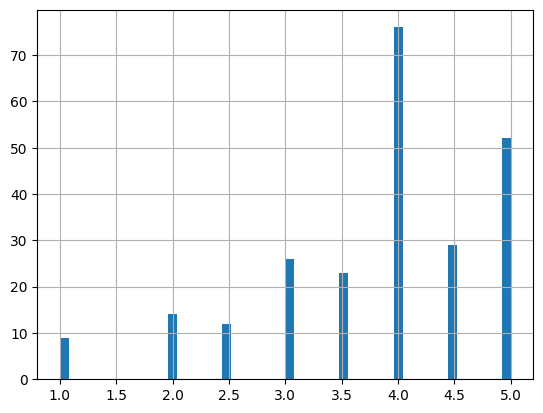

In [ ]:
# 종속변수 시각화
df['Quality (1-5)'].hist(bins=50)

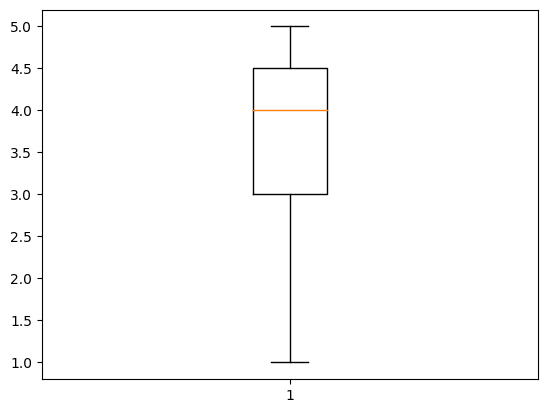

In [ ]:
# 종속변수 시각화 [박스플랏]
plt.boxplot(df['Quality (1-5)'])
plt.show()

(해석) 퀄리티 점수가 3.5~4.5 사이에 대부분 존재한다. 평균은 약 4점이다.

컬럼 간 상관관계 탐색

In [ ]:
cols = ['Quality (1-5)', 'Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)']

corr = df[cols].corr(method = 'pearson')
corr

,Quality (1-5),Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5)
Quality (1-5),1.000000,-0.243113,-0.330268,0.631343,-0.321942,-0.302732,-0.474754,0.280764
Size (cm),-0.243113,1.000000,0.305348,-0.305865,0.330487,0.236863,0.313330,-0.256665
Weight (g),-0.330268,0.305348,1.000000,-0.239659,0.303806,0.316806,0.374670,-0.260454
Brix (Sweetness),0.631343,-0.305865,-0.239659,1.000000,-0.300080,-0.344376,-0.329862,0.144666
pH (Acidity),-0.321942,0.330487,0.303806,-0.300080,1.000000,0.360222,0.262461,-0.232627
Softness (1-5),-0.302732,0.236863,0.316806,-0.344376,0.360222,1.000000,0.331103,-0.202404
HarvestTime (days),-0.474754,0.313330,0.374670,-0.329862,0.262461,0.331103,1.000000,-0.268691
Ripeness (1-5),0.280764,-0.256665,-0.260454,0.144666,-0.232627,-0.202404,-0.268691,1.000000


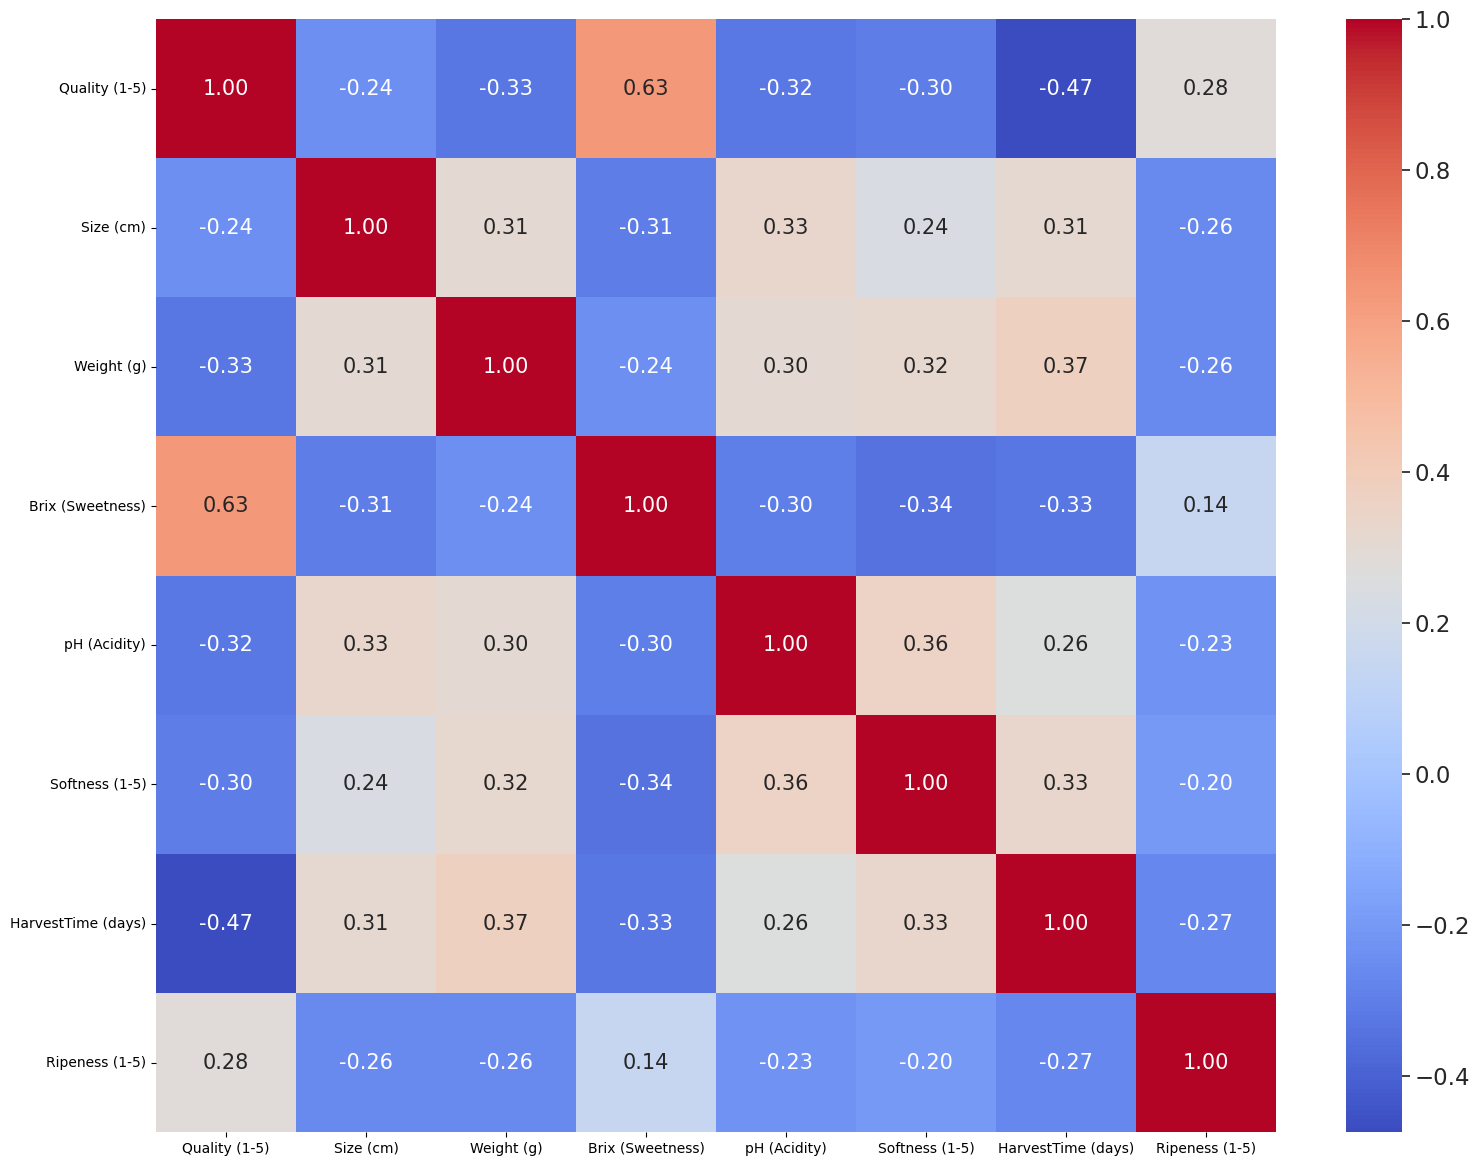

In [ ]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "coolwarm")
plt.tight_layout()

(해석) 오렌지의 퀄리티와 당도가 강한 양의 상관관계를 보이고 있다. \\
음의 상관관계를 살펴보면, 수확시기가 가장 강한 음의 상관관계를 보이고 있다.

In [ ]:
### Pearson 상관계수
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
pearson_corr = correlation_matrix['Quality (1-5)']
print(pearson_corr)

Size (cm)            -0.243113
Weight (g)           -0.330268
Brix (Sweetness)      0.631343
pH (Acidity)         -0.321942
Softness (1-5)       -0.302732
HarvestTime (days)   -0.474754
Ripeness (1-5)        0.280764
Quality (1-5)         1.000000
Name: Quality (1-5), dtype: float64


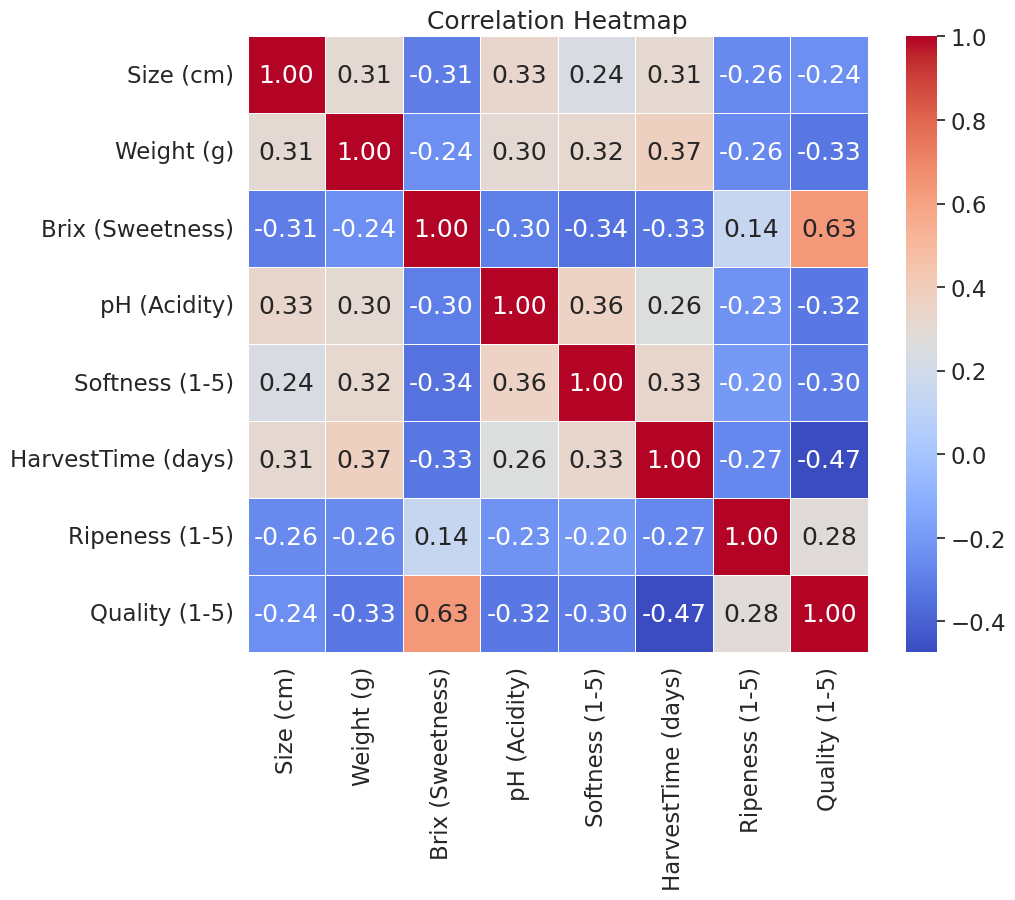

In [ ]:
### 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

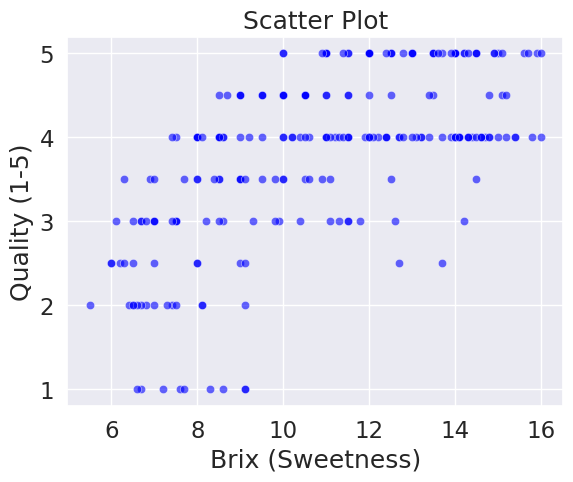

In [ ]:
### 상관관계가 비교적 뚜렷하게 나타나는 당도와 수확시기 살펴보기
# 산점도
sns.scatterplot(data=df, x='Brix (Sweetness)', y='Quality (1-5)', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

당도가 높을 수록 오렌지의 퀄리티 점수가 높은 것을 확인할 수 있다.

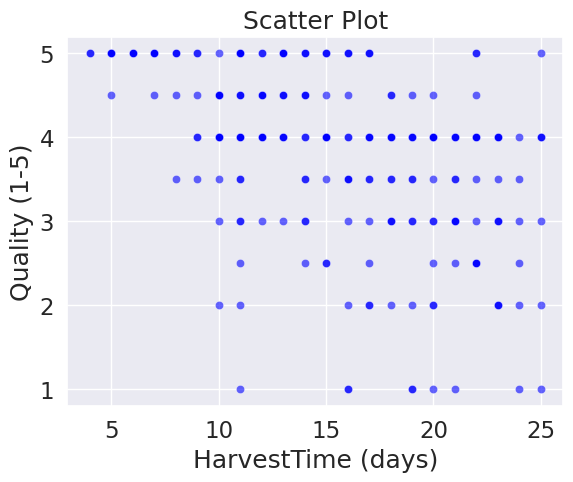

In [ ]:
sns.scatterplot(data=df, x='HarvestTime (days)', y='Quality (1-5)', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

상관관계가 뚜렷하진 않지만, 수확한 시기가 길어질수록(수확한지 오래될수록) 비교적 오렌지의 퀄리티가 떨어짐을 확인 할 수 있음

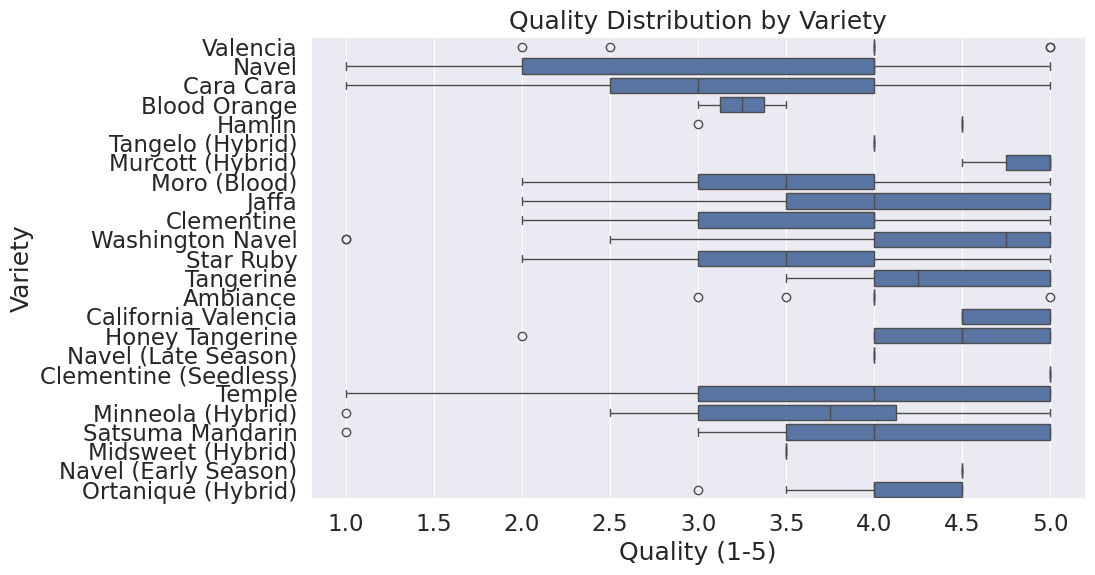

In [ ]:
# 품종별 퀄리티 차이
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality (1-5)', y='Variety', data=df)
plt.title('Quality Distribution by Variety')
plt.xlabel('Quality (1-5)')
plt.ylabel('Variety')
plt.show()

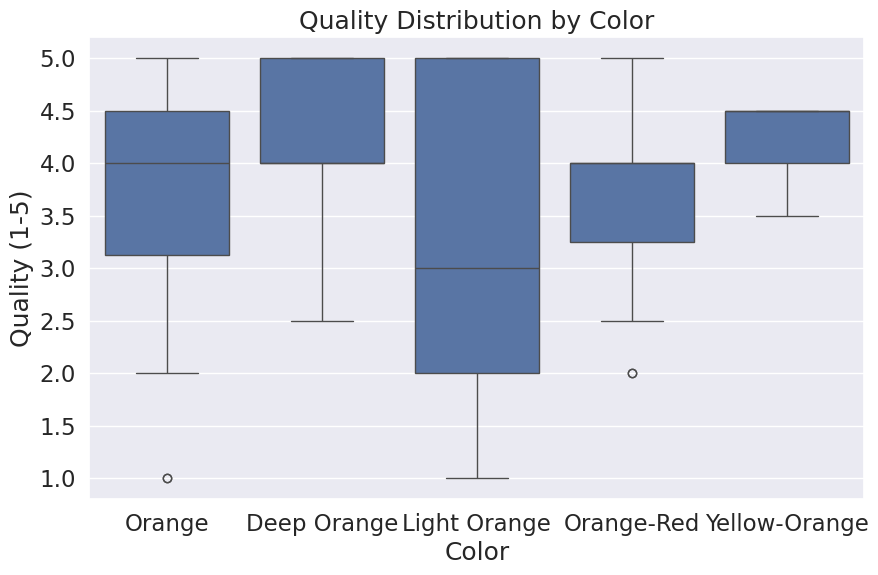

In [ ]:
# 색상별 퀄리티 차이
plt.figure(figsize=(10, 6))
sns.boxplot(x='Color', y='Quality (1-5)', data=df)
plt.title('Quality Distribution by Color')
plt.xlabel('Color')
plt.ylabel('Quality (1-5)')
plt.show()

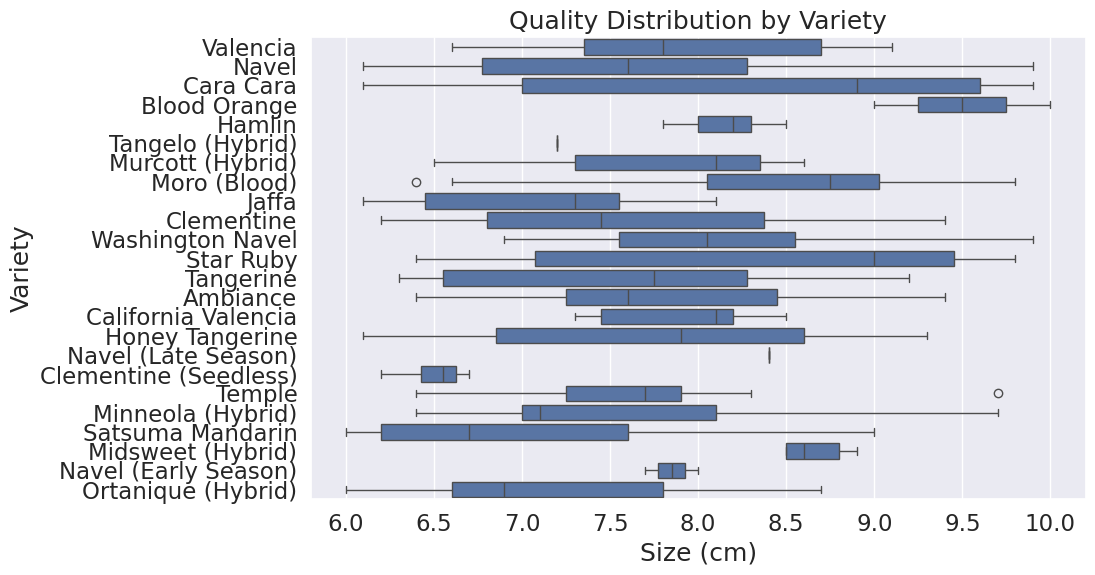

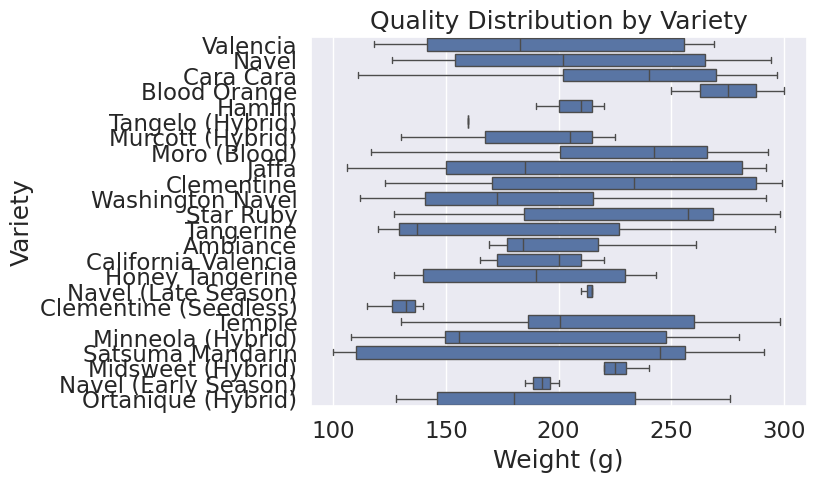

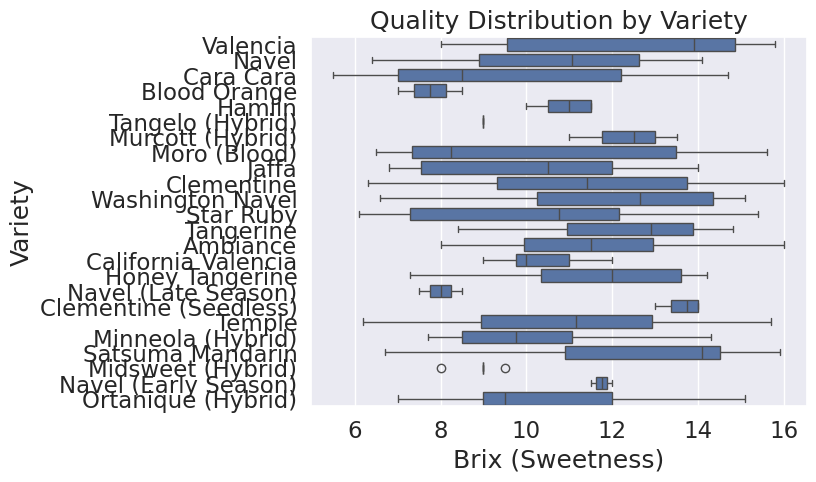

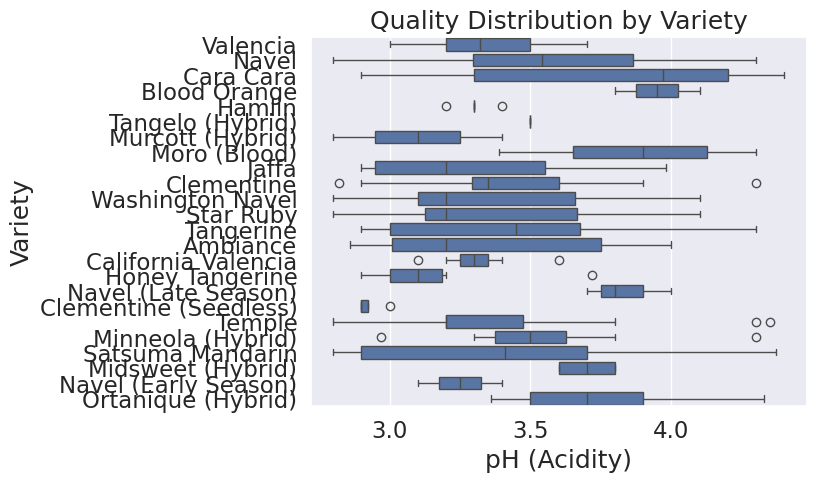

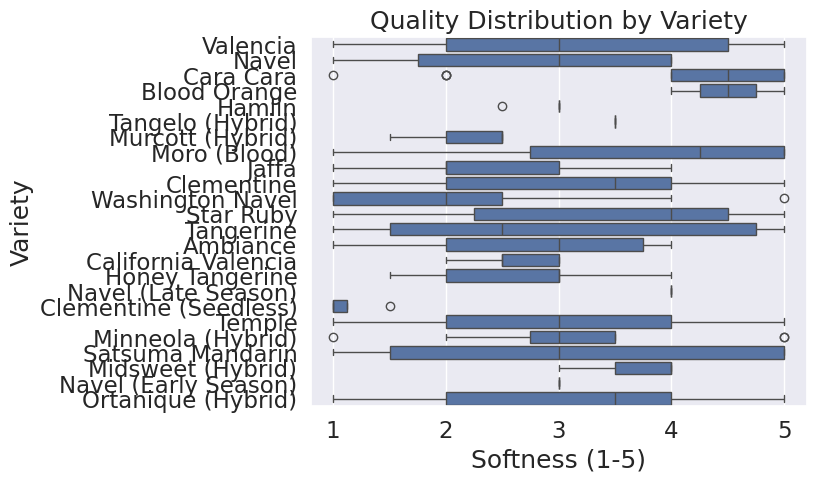

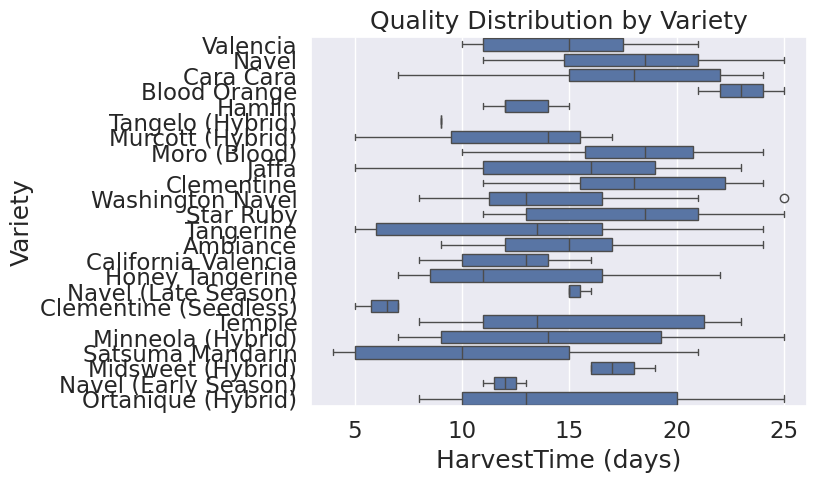

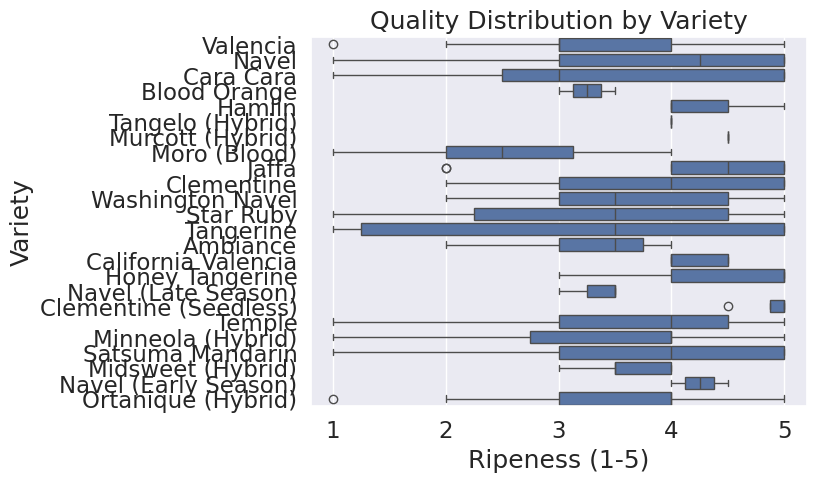

In [ ]:
# 품종별 오렌지 특성 차이
value = ['Size (cm)',	'Weight (g)',	'Brix (Sweetness)',	'pH (Acidity)',	'Softness (1-5)',	'HarvestTime (days)',	'Ripeness (1-5)']
plt.figure(figsize=(10, 6))
for i in value:
  sns.boxplot(x= i, y='Variety', data=df)
  plt.title('Quality Distribution by Variety')
  plt.xlabel(i)
  plt.ylabel('Variety')
  plt.show()

데이터 전처리

In [ ]:
### 컬럼마다 특성을 확인후, 전처리 해야 할 부분을 진행

In [ ]:
# 흠집 여부 원핫 인코딩
# Blemishes 컬럼을 이진화
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].apply(lambda x: 1 if isinstance(x, str) and 'Y' in x else 0)
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,1,4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,1,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,1,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),1,3.0


In [ ]:
# 색상, 품종 label incording
# LabelEncoder를 객체로 생성
le = LabelEncoder()
# fit_transform()으로 라벨인코딩을 수행
#df['Color'] = le.fit_transform(df['Color'])
df['Variety'] = le.fit_transform(df['Variety'])
# 라벨인코딩이 잘 되었는지 확인
#df

In [ ]:
# 색상, 품종 label incording (예시로 적은것, 필요에 따라 전처리 다르게 진행해주셔도 괜찮습니다.)
# Color와 Variety 컬럼에 원-핫 인코딩 적용
#df = pd.get_dummies(df, columns=['Color', 'Variety']).astype(int)
df = pd.get_dummies(df, columns=['Color']).astype(int)
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Variety,Blemishes (Y/N),Quality (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,Color_Orange-Red,Color_Yellow-Orange
0,7,180,12,3,2,10,4,22,0,4,0,0,1,0,0
1,8,220,10,3,3,14,4,13,0,4,1,0,0,0,0
2,6,150,14,3,1,7,5,3,0,5,0,1,0,0,0
3,9,250,8,3,4,21,3,1,0,3,0,0,0,1,0
4,8,210,11,3,2,12,5,6,1,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8,194,10,3,5,13,1,20,1,5,0,0,0,1,0
237,7,275,8,3,5,20,5,10,0,4,0,1,0,0,0
238,7,196,15,3,3,13,3,21,1,5,1,0,0,0,0
239,7,251,9,4,3,23,1,11,1,3,0,1,0,0,0


In [ ]:
# 이상치 처리
# 제 1 사분위수(Q1)와 제 3 사분위수(Q3) 계산

# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)

# # IQR 계산
# IQR = Q3 - Q1

# # 이상치 경계 설정
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # 이상치 탐지
# outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# # 이상치 제거
# cleaned_df = df[~outliers]

# print("이상치가 제거된 데이터프레임:")
# print(cleaned_df)

# 히스토그램과 박스플랏을 살펴본 결과, 딱히 이상치라고 할만한 데이터가 보이지 않아 이상치 제거는 일단 주석 처리 해두었습니다.
# 제거된 데이터 프레임의 개수도 이전과 동일한 것을 확인할 수 있습니다.

In [ ]:
#이상치가 제거된 데이터 확인
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Variety,Blemishes (Y/N),Quality (1-5),Color_Deep Orange,Color_Light Orange,Color_Orange,Color_Orange-Red,Color_Yellow-Orange
0,7,180,12,3,2,10,4,22,0,4,0,0,1,0,0
1,8,220,10,3,3,14,4,13,0,4,1,0,0,0,0
2,6,150,14,3,1,7,5,3,0,5,0,1,0,0,0
3,9,250,8,3,4,21,3,1,0,3,0,0,0,1,0
4,8,210,11,3,2,12,5,6,1,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,8,194,10,3,5,13,1,20,1,5,0,0,0,1,0
237,7,275,8,3,5,20,5,10,0,4,0,1,0,0,0
238,7,196,15,3,3,13,3,21,1,5,1,0,0,0,0
239,7,251,9,4,3,23,1,11,1,3,0,1,0,0,0


In [ ]:
# # 크기, 무게, 산도, 당도, 수확시기 특성 스케일
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# features_scale = df[['Size (cm)', 'Weight (g)', 'pH (Acidity)', 'Brix (Sweetness)', 'HarvestTime (days)']]

# 표준화 (Standardization)
# scaler = StandardScaler()
# scaled_features_standardized = scaler.fit_transform(features_scale)
# scaled_standardized = pd.DataFrame(scaled_features_standardized, columns=features_scale.columns)

# # 정규화 (Normalization)
# scaler = MinMaxScaler()
# scaled_features_normalized = scaler.fit_transform(features_scale)
# scaled_normalized = pd.DataFrame(scaled_features_normalized, columns=features_scale.columns)

# print("표준화된 특성:")
# print(scaled_standardized)
# print("\n정규화된 특성:")
# print(scaled_normalized)

**모델링**
-
-
-
-


In [ ]:
# 종속변수 분리
X = df.drop('Quality (1-5)', axis=1)
y = df['Quality (1-5)']

In [ ]:
# 트레이닝 셋과 테스트 셋 나누기 (8:2 비율로 나누어 주었습니다.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 랜덤 포레스트
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 예측
y_pred = rf_model.predict(X_test)

In [ ]:
# 성능평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Squared Error (MSE): 0.37
Root Mean Squared Error (RMSE): 0.61
R-squared (R²): 0.57


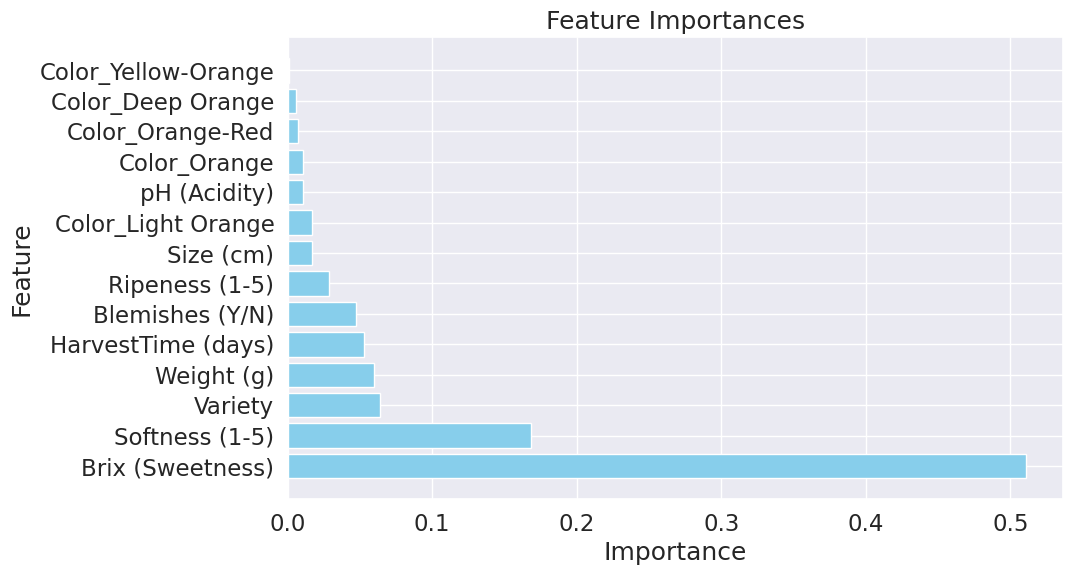

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

#Decision Tree
dectree = DecisionTreeClassifier(random_state=42)
dectree.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 50, 100]
}

# 그리드 서치 객체 생성(교차검증 포함)
grid_search = GridSearchCV(estimator=dectree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# 그리드 서치 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 최적의 하이퍼파라미터로 모델 생성
best_tree = grid_search.best_estimator_

# 최적의 모델로 학습 및 예측
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)

# 모델 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best Parameters: {'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Accuracy: 1.0


In [ ]:
# 예측 결과 확인
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head())

   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1


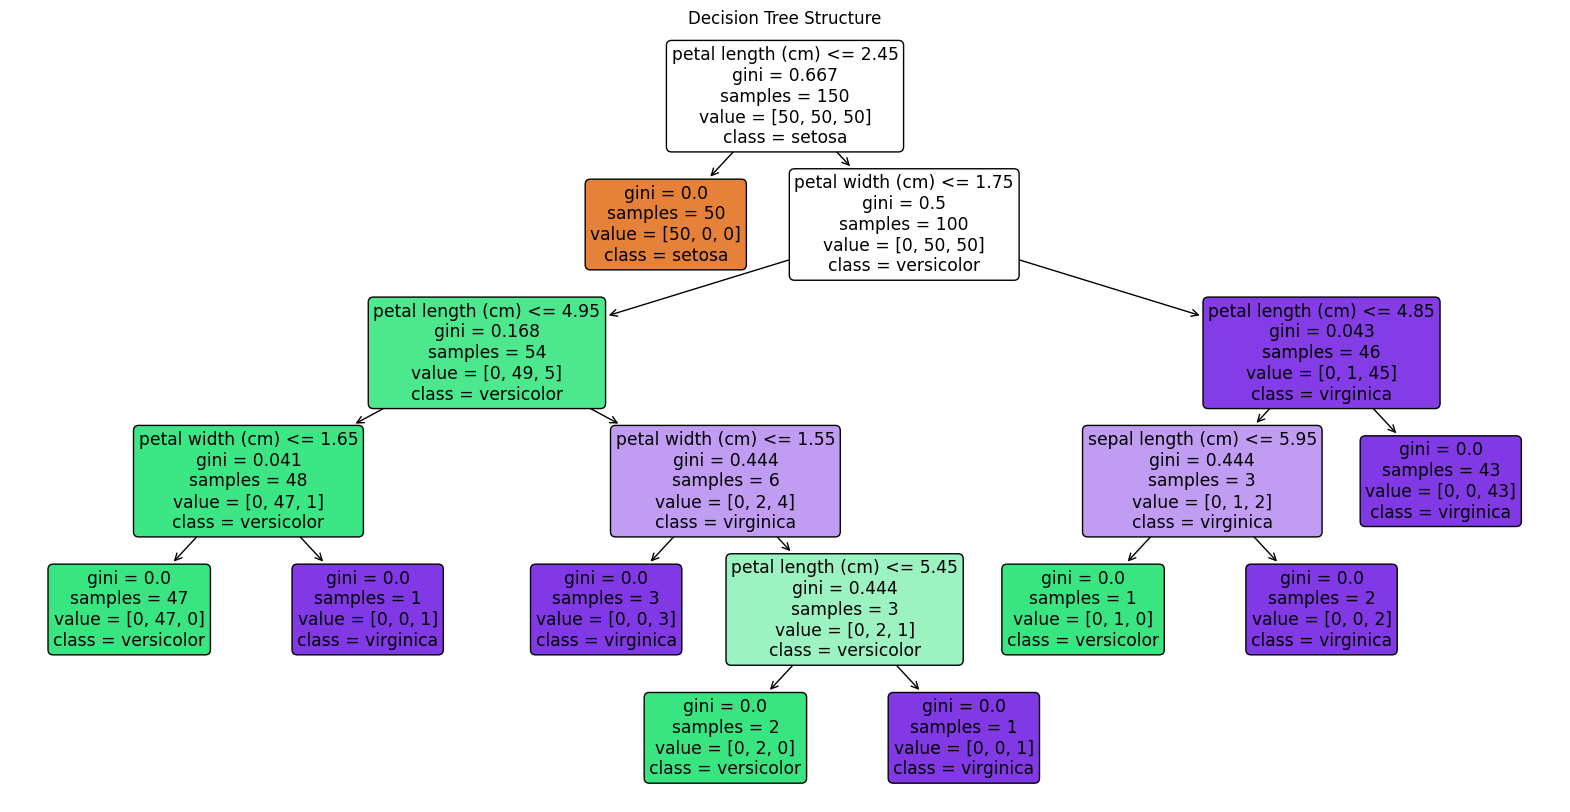

In [ ]:
from sklearn.tree import plot_tree

# 트리 구조 시각화
plt.figure(figsize=(20, 10))
plot_tree(dectree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

<인사이트 도출>

- 모델링 결론

1. Decision Tree의 루트 노드가 Brix (Sweetness)를 기준으로 데이터를 분할하고 있기 때문에, 과일의 당도가 오렌지의 품질을 결정하는데 중요한 영향을 미친다는 것을 알 수 있다.

2. Brix (Sweetness) 외에도 다른 특징들도 분할 기준이 됨으로써 서로 상호작용하여 예측값에 영향을 미친다는 것을 파악할 수 있다.

- 기대효과

1. 오렌지의 품질을 예측함으로 시장에서의 경쟁력을 갖출 수 있고, 공급되는 오렌지의 품질에 따라 적절한 가격 정책을 설정할 수 있다.

2. 오렌지의 품질 표준을 준수하는 데 도움이 되고 자원 낭비를 줄여 효율적인 생산 및 유통 관리를 할 수 있다.



In [ ]:
### 컬럼 유의성 확인

In [ ]:
!pip install rotation-forest --upgrade

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from rotation_forest import RotationForestClassifier

# 특성과 타겟 분리
X = df.drop('Quality (1-5)', axis=1)
y = df['Quality (1-5)']

# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rotation Forest 모델 초기화
rotation_forest = RotationForestClassifier(n_estimators=100)

# 모델 학습
rotation_forest.fit(X_train, y_train)

# 예측 수행
y_pred = rotation_forest.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# 중요 피처 확인 (옵션)
importances = rotation_forest.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print('Feature Importances:')
print(feature_importances)


TypeError: ForestClassifier.__init__() missing 1 required positional argument: 'estimator'